In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load and preprocess dataset
data = pd.read_csv(r"C:\Users\ganes\Desktop\Python\PowerCheck.csv")

# Select only numerical columns
numerical_columns = ['BMI', 'Blood_pressure_level', 'Cholesterol', 'Age']  # Add other numerical columns if needed
data = data[numerical_columns + ['Has_Disease', 'Length_of_Stay']]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features and target for classification
X_classification = data.drop(['Has_Disease', 'Length_of_Stay'], axis=1)
y_classification = data['Has_Disease']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

# Initialize and train different models
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Neural Network": MLPClassifier(max_iter=300)
}

# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    return accuracy, precision, recall, f1, conf_matrix, class_report

# Evaluate all models
for model_name, model in models.items():
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(model, X_train_class, y_train_class, X_test_class, y_test_class)
    print(f"\n{model_name} Classification Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")



k-NN Classification Metrics:
Accuracy: 0.55
Precision: 0.55
Recall: 0.55
F1-Score: 0.55
Confusion Matrix:
[[80 62]
 [73 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       142
           1       0.58      0.54      0.56       158

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300


SVM Classification Metrics:
Accuracy: 0.49
Precision: 0.49
Recall: 0.49
F1-Score: 0.49
Confusion Matrix:
[[69 73]
 [79 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       142
           1       0.52      0.50      0.51       158

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300


Decision Tree Classification Metrics:
Accuracy: 

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Linear Regression Metrics:
Mean Squared Error: 325.95
R-squared: -0.01


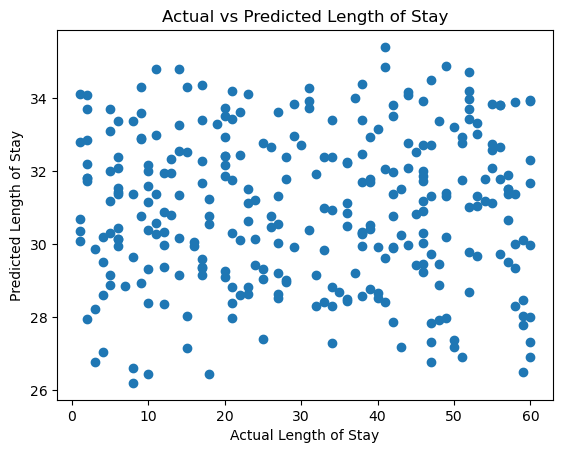

In [10]:
#linear regression 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess dataset
data = pd.read_csv(r"C:\Users\ganes\Desktop\Python\PowerCheck.csv")

# Select only numerical columns
numerical_columns = ['BMI', 'Blood_pressure_level', 'Cholesterol', 'Age']  # Add other numerical columns if needed
data = data[numerical_columns + ['Has_Disease', 'Length_of_Stay']]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features and target for regression
X_regression = data.drop(['Has_Disease', 'Length_of_Stay'], axis=1)
y_regression = data['Length_of_Stay']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = linear_reg.predict(X_test_reg)

# Evaluate model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nLinear Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted values
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Actual vs Predicted Length of Stay")
plt.show()


C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


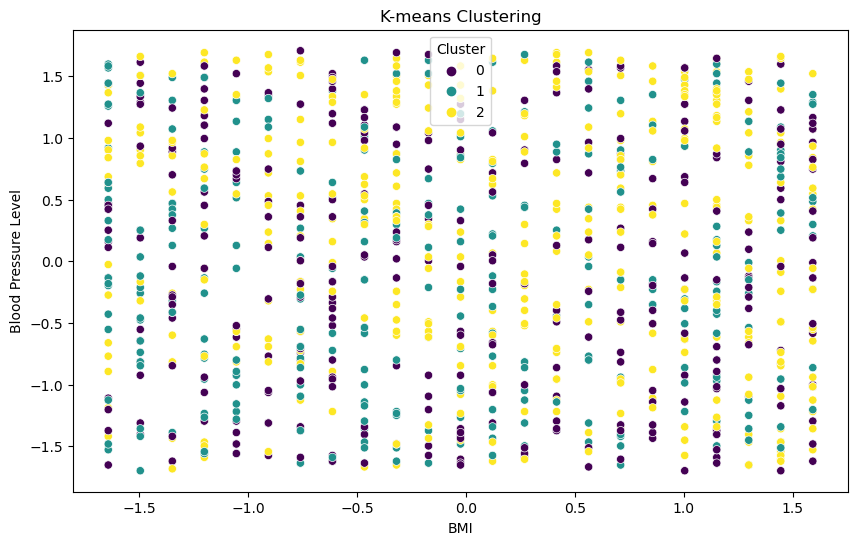

In [11]:
#k-means clustering 

from sklearn.cluster import KMeans
import seaborn as sns

# Define features for clustering
X_clustering = data[numerical_columns]

# Initialize and train K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Add cluster labels to the data
data['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Blood_pressure_level', hue='Cluster', data=data, palette='viridis')
plt.title("K-means Clustering")
plt.xlabel("BMI")
plt.ylabel("Blood Pressure Level")
plt.legend(title='Cluster')
plt.show()



k-NN Classification Metrics:
Accuracy: 0.55
Precision: 0.55
Recall: 0.55
F1-Score: 0.55
Confusion Matrix:
[[80 62]
 [73 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       142
           1       0.58      0.54      0.56       158

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



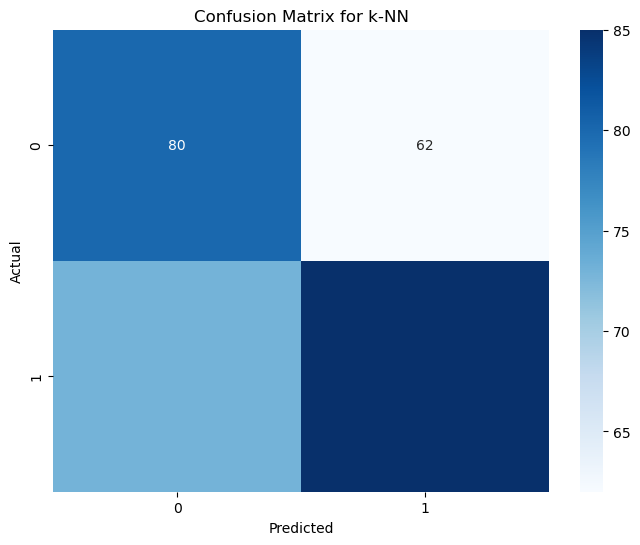

In [15]:
#KNN implementation 

import pandas as pd
from sklearn.model_selection import train_test_splitfrom sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess dataset
data = pd.read_csv(r"C:\Users\ganes\Desktop\Python\PowerCheck.csv")

# Select only numerical columns
numerical_columns = ['BMI', 'Blood_pressure_level', 'Cholesterol', 'Age']
data = data[numerical_columns + ['Has_Disease', 'Length_of_Stay']]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features and target
X = data[numerical_columns]
y_classification = data['Has_Disease']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Initialize and train k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_class, y_train_class)

# Make predictions
predictions = knn.predict(X_test_class)

# Evaluate model
accuracy = accuracy_score(y_test_class, predictions)
precision = precision_score(y_test_class, predictions, average='macro')
recall = recall_score(y_test_class, predictions, average='macro')
f1 = f1_score(y_test_class, predictions, average='macro')
conf_matrix = confusion_matrix(y_test_class, predictions)
class_report = classification_report(y_test_class, predictions)

print("\nk-NN Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN')
plt.show()



SVM Classification Metrics:
Accuracy: 0.48
Precision: 0.49
Recall: 0.49
F1-Score: 0.48
Confusion Matrix:
[[75 67]
 [88 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       142
           1       0.51      0.44      0.47       158

    accuracy                           0.48       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.48      0.48       300



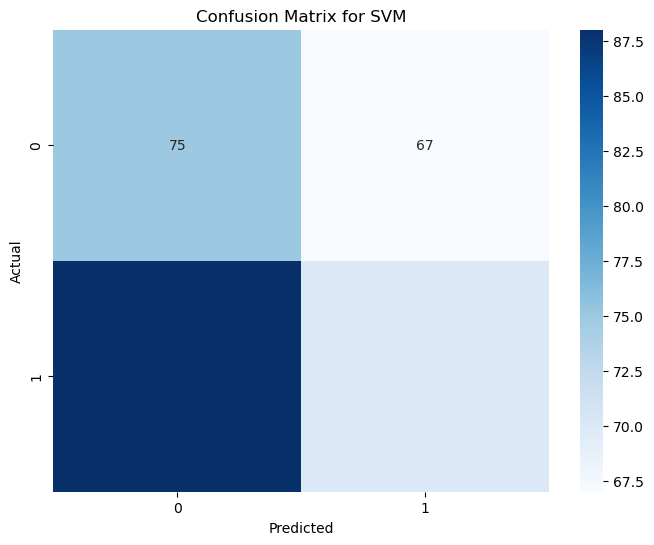

In [16]:
#SVM implementation 

from sklearn.svm import SVC

# Initialize and train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_class, y_train_class)

# Make predictions
predictions = svm.predict(X_test_class)

# Evaluate model
accuracy = accuracy_score(y_test_class, predictions)
precision = precision_score(y_test_class, predictions, average='macro')
recall = recall_score(y_test_class, predictions, average='macro')
f1 = f1_score(y_test_class, predictions, average='macro')
conf_matrix = confusion_matrix(y_test_class, predictions)
class_report = classification_report(y_test_class, predictions)

print("\nSVM Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()



Decision Tree Classification Metrics:
Accuracy: 0.44
Precision: 0.44
Recall: 0.45
F1-Score: 0.44
Confusion Matrix:
[[68 74]
 [93 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.48      0.45       142
           1       0.47      0.41      0.44       158

    accuracy                           0.44       300
   macro avg       0.44      0.45      0.44       300
weighted avg       0.45      0.44      0.44       300



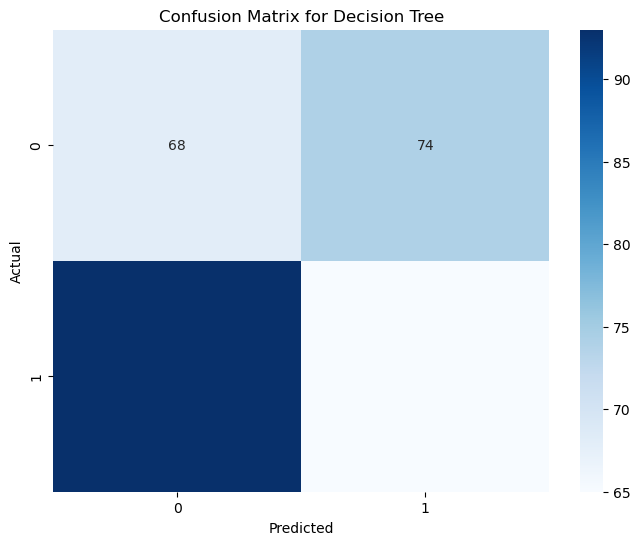

In [17]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_class, y_train_class)

# Make predictions
predictions = dt.predict(X_test_class)

# Evaluate model
accuracy = accuracy_score(y_test_class, predictions)
precision = precision_score(y_test_class, predictions, average='macro')
recall = recall_score(y_test_class, predictions, average='macro')
f1 = f1_score(y_test_class, predictions, average='macro')
conf_matrix = confusion_matrix(y_test_class, predictions)
class_report = classification_report(y_test_class, predictions)

print("\nDecision Tree Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()




Naive Bayes Classification Metrics:
Accuracy: 0.49
Precision: 0.50
Recall: 0.50
F1-Score: 0.49
Confusion Matrix:
[[89 53]
 [99 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.63      0.54       142
           1       0.53      0.37      0.44       158

    accuracy                           0.49       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.50      0.49      0.49       300



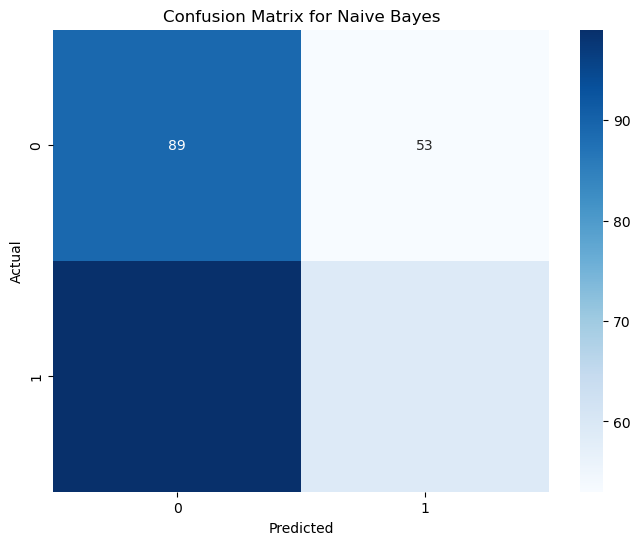

In [18]:
#naive bayes implementation

from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_class, y_train_class)

# Make predictions
predictions = nb.predict(X_test_class)

# Evaluate model
accuracy = accuracy_score(y_test_class, predictions)
precision = precision_score(y_test_class, predictions, average='macro')
recall = recall_score(y_test_class, predictions, average='macro')
f1 = f1_score(y_test_class, predictions, average='macro')
conf_matrix = confusion_matrix(y_test_class, predictions)
class_report = classification_report(y_test_class, predictions)

print("\nNaive Bayes Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Neural Network Classification Metrics:
Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1-Score: 0.52
Confusion Matrix:
[[84 58]
 [87 71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.59      0.54       142
           1       0.55      0.45      0.49       158

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.51       300



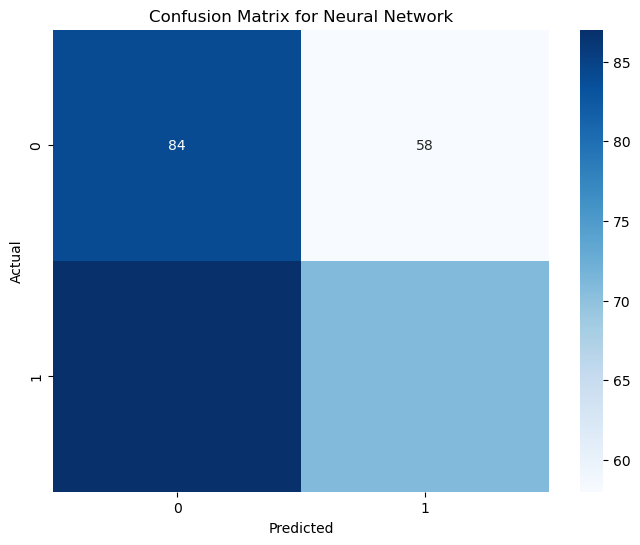

In [20]:
#neural network implementation 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize and train Neural Network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_class.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_class, y_train_class, epochs=50, batch_size=10, verbose=0)

# Make predictions
predictions = model.predict(X_test_class)
predictions = (predictions > 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test_class, predictions)
precision = precision_score(y_test_class, predictions, average='macro')
recall = recall_score(y_test_class, predictions, average='macro')
f1 = f1_score(y_test_class, predictions, average='macro')
conf_matrix = confusion_matrix(y_test_class, predictions)
class_report = classification_report(y_test_class, predictions)

print("\nNeural Network Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()
